In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_parquet('processed_orders.parquet')

In [23]:
# Маржа в % для визуализации
df['Profit Margin'] = df['Profit Margin'] * 100

In [24]:
#Статистическое описание данных
print("Статистическое описание данных:")
print(df[['Сумма, BYN', 'Profit', 'Profit Margin']].describe())

Статистическое описание данных:
        Сумма, BYN      Profit  Profit Margin
count  6481.000000  6481.00000    6453.000000
mean     64.175056     8.10626      15.021517
std      89.795113    11.37125      10.758001
min       0.000000     0.00000       0.000000
25%      15.840000     0.00000       0.000000
50%      33.030000     4.70000      19.343303
75%      76.770000    11.99000      24.829157
max    1356.820000   231.60000     100.000000


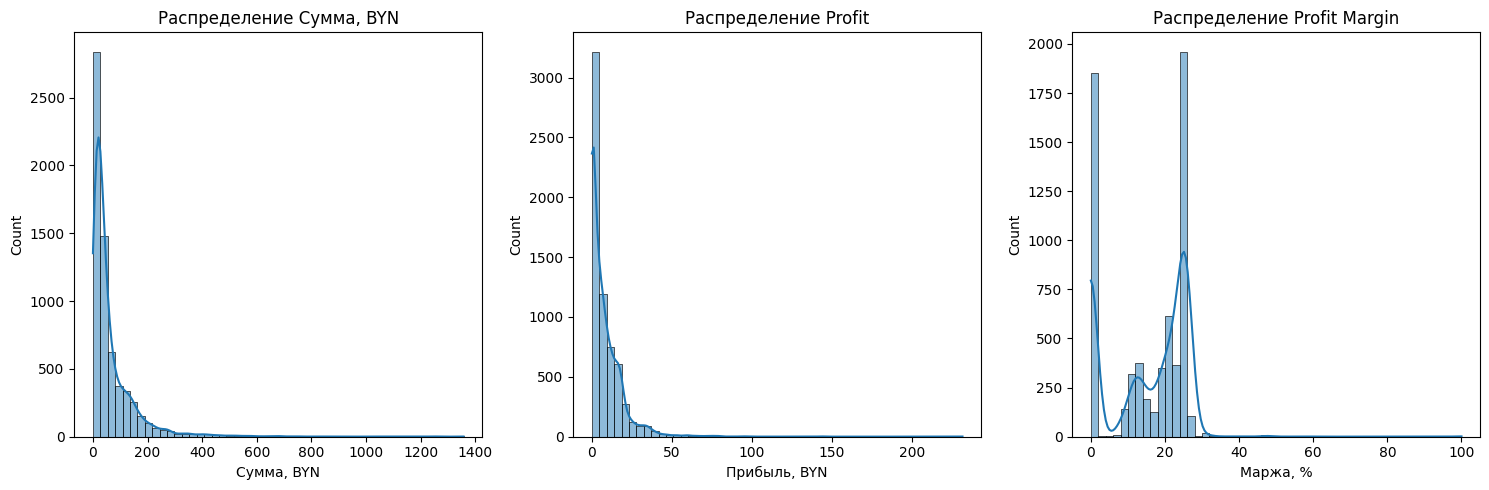

In [25]:
# Гистограммы 
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Сумма, BYN'], bins=50, kde=True)
plt.title('Распределение Сумма, BYN')
plt.xlabel('Сумма, BYN')

plt.subplot(1, 3, 2)
sns.histplot(df['Profit'], bins=50, kde=True)
plt.title('Распределение Profit')
plt.xlabel('Прибыль, BYN')

plt.subplot(1, 3, 3)
sns.histplot(df['Profit Margin'], bins=50, kde=True)
plt.title('Распределение Profit Margin')
plt.xlabel('Маржа, %')

plt.tight_layout()
plt.show()

In [26]:
# --- 2. Расчет метрик ---

In [27]:
# 2.1. MAU (Monthly Active Users)
# Извлечение года и месяца из order_date
df['year_month'] = df['Дата'].dt.to_period('M')
mau = df.groupby('year_month')['Клиент'].nunique().reset_index()
mau.columns = ['Year_Month', 'MAU']

print("\nMAU (Monthly Active Users):")
print(mau)


MAU (Monthly Active Users):
   Year_Month  MAU
0     2024-07   62
1     2024-08  170
2     2024-09  156
3     2024-10  173
4     2024-11  165
5     2024-12  136
6     2025-01  144
7     2025-02  137
8     2025-03  145
9     2025-04  174
10    2025-05  180
11    2025-06  173
12    2025-07  133


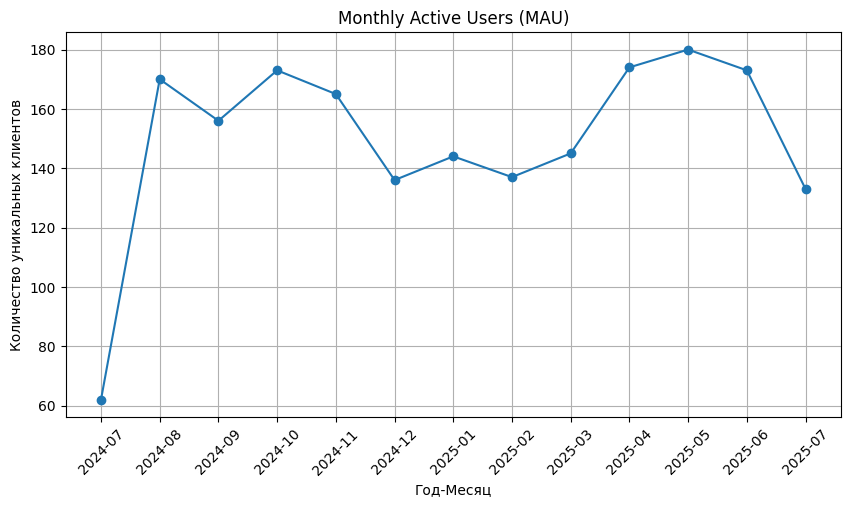

In [28]:
# Визуализация MAU
plt.figure(figsize=(10, 5))
plt.plot(mau['Year_Month'].astype(str), mau['MAU'], marker='o')
plt.title('Monthly Active Users (MAU)')
plt.xlabel('Год-Месяц')
plt.ylabel('Количество уникальных клиентов')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [29]:
# 2.2. RPR (Repeat Purchase Ratio)
# Подсчет количества заказов на клиента
orders_per_customer = df.groupby('Клиент')['Дата'].count()
repeat_customers = orders_per_customer[orders_per_customer > 1].count()
total_customers = orders_per_customer.count()
rpr = repeat_customers / total_customers

print(f"\nRPR (Repeat Purchase Ratio): {rpr:.2%}")



RPR (Repeat Purchase Ratio): 75.04%


In [32]:
#AOV (Average Order Value)
aov = df['Сумма, BYN'].sum() / df['Сумма, BYN'].count()
print(f"\nAOV (Average Order Value) - Средний чек: {aov:.2f} BYN")


AOV (Average Order Value) - Средний чек: 64.18 BYN


In [34]:
# CLV (Customer Lifetime Value)
# Средний чек (AOV)
avg_order_value = df['Сумма, BYN'].mean()

# Частота покупок (среднее количество заказов на клиента)
avg_purchase_frequency = df.groupby('Клиент')['Дата'].count().mean()

# Средний срок жизни клиента (в месяцах, на основе разницы между первым и последним заказом)
customer_lifespan = df.groupby('Клиент')['Дата'].agg(['min', 'max'])
customer_lifespan['lifespan_months'] = (customer_lifespan['max'] - customer_lifespan['min']).dt.days / 30
avg_lifespan = customer_lifespan['lifespan_months'].mean()

# CLV = Средний чек * Частота покупок * Средний срок жизни
clv = avg_order_value * avg_purchase_frequency * avg_lifespan
print(f"\nCLV (Customer Lifetime Value): {clv:.2f} BYN")


CLV (Customer Lifetime Value): 3083.45 BYN
